# Machine Learning Evaluation on the Engineering Graduate Salary Dataset

## Learning Objectives:
- Data Cleaning
- Data Pre-processing
- Linear Regression
- Evaluation Metrics

### Objective:
The goal of this assignment is to apply the concepts of linear regression, data cleaning, preprocessing, and evaluation metrics to the Engineering Graduate Salary dataset. You will perform a series of tasks that involve preparing the data, training a linear regression model, and evaluating its performance.

### Dataset:
The Engineering Graduate Salary dataset contains data about engineering graduates, including their demographics, education, and employment outcomes. Each record in the dataset includes features such as gender, 10th and 12th grade percentages, board of education, college tier, various engineering discipline scores, personality traits scores, and the target variable, Salary.


### Download Dataset

[Engineering_graduate_salary.csv](https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction?resource=download)


## Note
For this Evaluation, please use only the numerical columns from the dataset for model training. Since the encoding of categorical variables has not been covered yet, you should exclude any non-numerical columns to simplify the data preparation process.

### Task 1: Data Cleaning
- Load the dataset.
- Check for missing values in the dataset. If there are any missing values, describe how you would handle them (e.g., removing, imputing with mean/median, etc.).

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od


In [2]:
# Code for Task 1: Load the dataset
od.download("https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction?resource=download")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shivammishra2022
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 172k/172k [00:00<00:00, 264kB/s]

In [135]:
df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\COLAB_File\engineering-graduate-salary-prediction\Engineering_graduate_salary.csv")

In [136]:
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [137]:
# Code for Task 1: Check for and handle missing values
df.isna().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

### Task 2: Data Preprocessing
- Split the dataset into training (80%) and testing (20%) sets.

In [138]:
df.dtypes

ID                         int64
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversi

In [139]:
df1=df[['ID','10percentage','12percentage','CollegeID','CollegeTier','collegeGPA','CollegeCityID','CollegeCityTier','GraduationYear','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']]

In [140]:
df1

,ID,10percentage,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,87.80,84.00,6920,1,73.82,6920,1,2013,650,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,57.00,64.50,6624,2,65.00,6624,0,2014,440,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,77.33,85.17,9084,2,61.94,9084,0,2011,485,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,84.30,86.00,8195,1,80.40,8195,1,2013,675,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,82.00,75.00,4889,2,64.30,4889,1,2012,575,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,75.00,73.00,1263,2,70.00,1263,1,2010,505,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,84.00,77.00,9481,2,75.20,9481,0,2012,345,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,91.40,65.56,547,2,73.19,547,0,2011,385,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,88.64,65.16,1629,2,74.81,1629,1,2011,465,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [141]:
df2=df[['ComputerProgramming','English','Logical','Quant','Salary']]
df2

,ComputerProgramming,English,Logical,Quant,Salary
0,485,650,665,810,445000
1,365,440,435,210,110000
2,-1,485,475,505,255000
3,655,675,620,635,420000
4,315,575,495,365,200000
...,...,...,...,...,...
2993,245,505,485,445,120000
2994,315,345,585,395,120000
2995,435,385,425,485,385000
2996,545,465,645,505,530000


In [142]:
df2.dtypes

ComputerProgramming    int64
English                int64
Logical                int64
Quant                  int64
Salary                 int64
dtype: object

<Axes: >

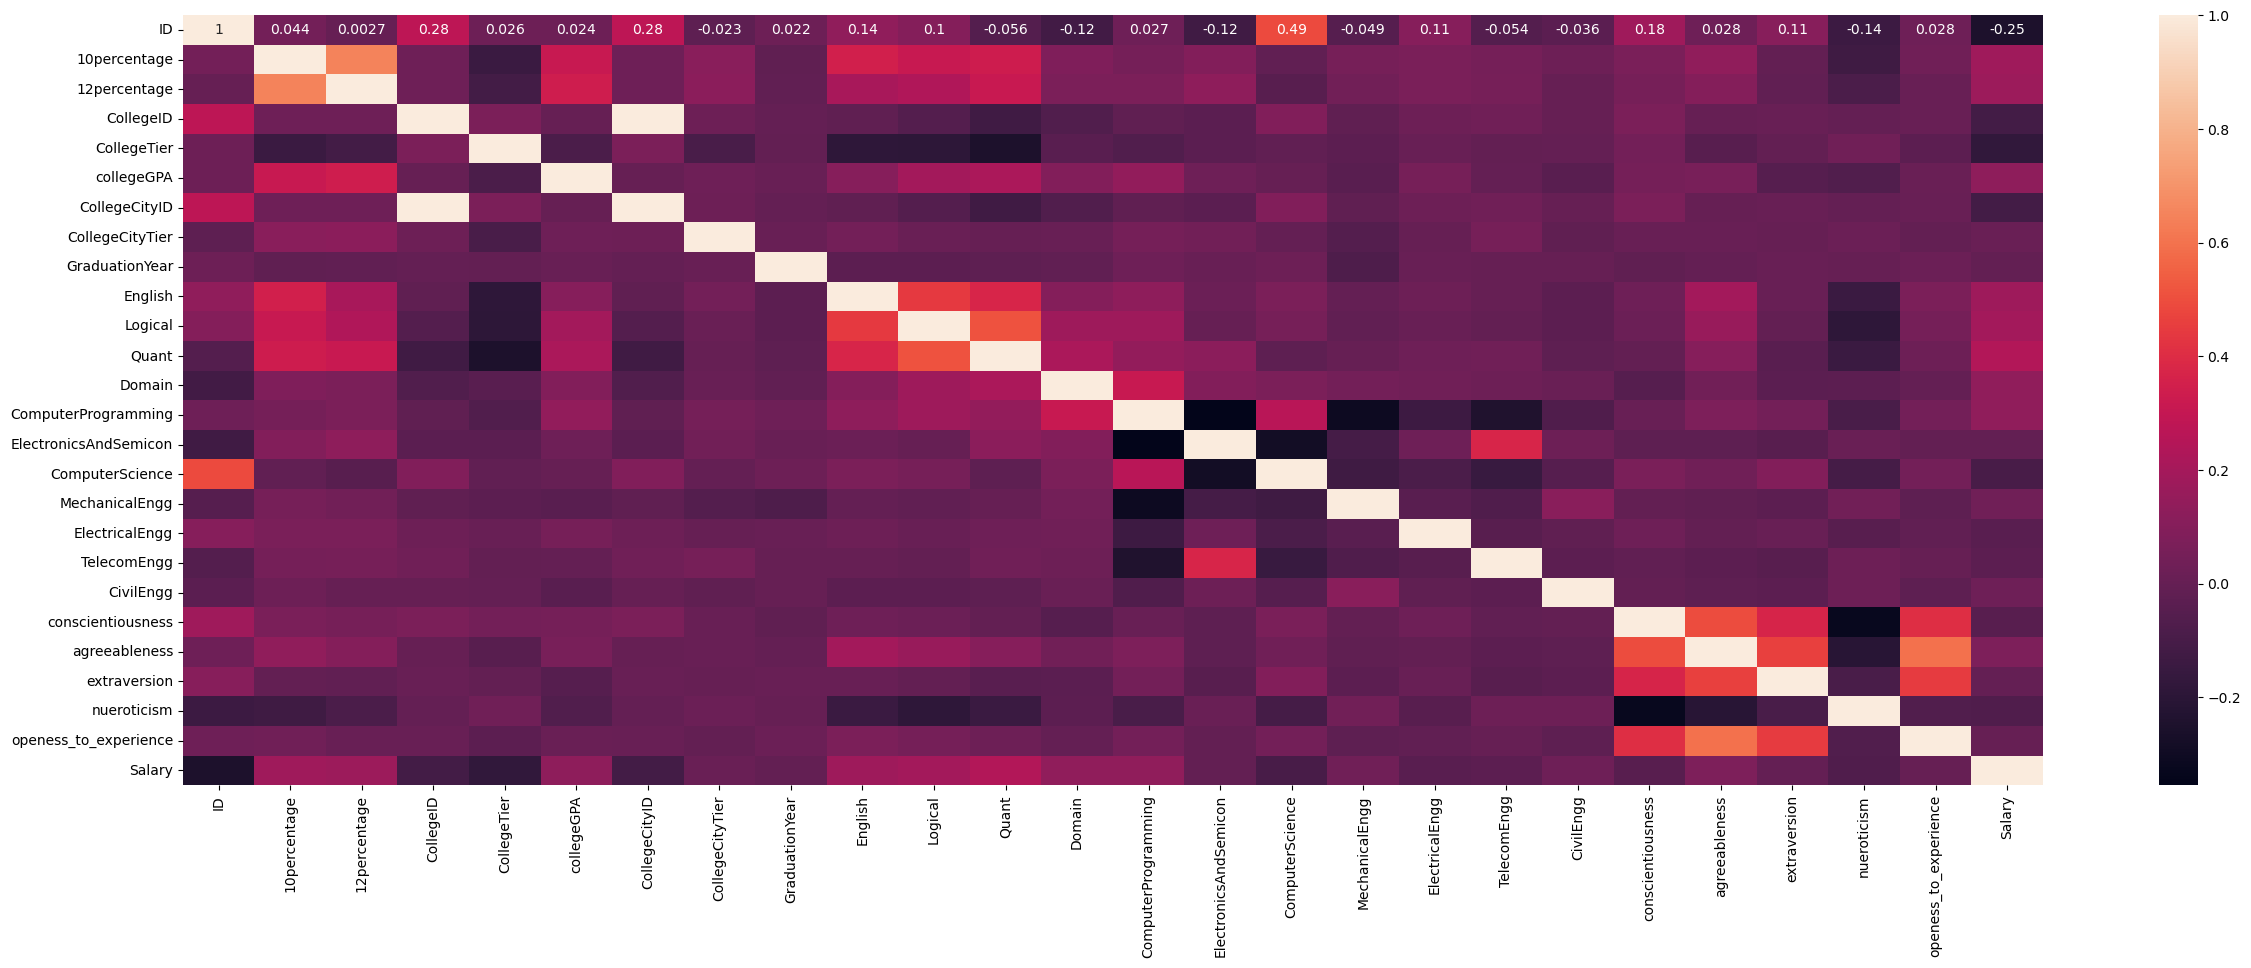

In [143]:
plt.figure(figsize=(30,10))
sns.heatmap(df1.corr(),annot=True)

In [144]:
# Code for Task 2: Split the dataset
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_input=train_df[['ComputerProgramming','English','Logical','Quant']]
train_output=train_df[['Salary']]
test_input=test_df[['ComputerProgramming','English','Logical','Quant']]
test_output=test_df[['Salary']]



### Task 3: Linear Regression
- Train a linear regression model using the training set.
- Predict the target values for the test set using the trained model.

In [145]:
# Code for Task 3: Train the linear regression model
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [146]:
linear.fit(train_input,train_output)

LinearRegression()

## Bais of linear equation

In [147]:
b=linear.intercept_
b

array([-42684.93121251])

## Weight or Slope of Linear equation

In [148]:
w=linear.coef_
w

array([[ 91.59946326, 189.20058675, 162.97925877, 273.99120624]])

In [149]:
train_pred=linear.predict(train_input)
test_pred=linear.predict(test_input)

In [150]:
train_input.head(3)

,ComputerProgramming,English,Logical,Quant
1569,-1,630,570,810
2228,405,415,500,415
2295,655,675,685,585


In [151]:
train_output.head(3)

,Salary
1569,240000
2228,350000
2295,4000000


In [152]:
test_input.head(3)

,ComputerProgramming,English,Logical,Quant
1376,435,615,445,505
932,315,515,485,445
144,455,450,555,445


In [153]:
test_output.head(3)

,Salary
1376,210000
932,180000
144,200000


In [154]:
# Code for Task 3: Make predictions on the test set
train_pred


array([[391250.89352914],
       [268127.07488451],
       [416948.76118814],
       ...,
       [232925.95656215],
       [337060.41377133],
       [200646.76336491]])

In [155]:
test_pred

array([[324410.52546102],
       [284578.22917147],
       [296512.66400347],
       [342807.72411903],
       [403400.9056026 ],
       [284496.6818734 ],
       [260717.34843186],
       [338902.95797945],
       [292217.44669985],
       [295525.23744305],
       [310226.27424948],
       [165024.17369348],
       [311937.62283708],
       [163552.00105546],
       [251782.06407093],
       [278746.8880636 ],
       [282148.95269993],
       [290744.43269318],
       [294806.45877792],
       [399049.56413702],
       [385181.13383794],
       [243544.33468392],
       [324303.13359339],
       [225695.55735724],
       [300066.5915866 ],
       [306368.38998381],
       [367244.6654653 ],
       [293740.24413336],
       [315806.38552789],
       [296653.96850619],
       [235234.56489163],
       [215125.91934015],
       [425860.75593277],
       [319909.62654946],
       [331116.17968936],
       [250403.5153484 ],
       [309625.58103251],
       [383621.43642656],
       [3070

# Model Prediction (Salary)--

In [156]:
def estimate_model(ComputerProgramming,English,Logical,Quant,w1,w2,w3,w4,b):
    return (w1*ComputerProgramming+w2*English+w3*Logical+w4*Quant+b)

In [168]:
salary=estimate_model(435,615,445,505,91.59946326,189.20058675,162.97925877,273.99120624,-42684.93121251)
print("Salary of the Engineer-",salary)

Salary of the Engineer- 324410.52546069


In [158]:
test_input.head(3)

,ComputerProgramming,English,Logical,Quant
1376,435,615,445,505
932,315,515,485,445
144,455,450,555,445


In [159]:
test_output.head(3)

,Salary
1376,210000
932,180000
144,200000


### Task 4: Evaluation Metrics
- Calculate and report the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared value of the model on the test set.
- Briefly discuss what these metrics tell you about the model's performance.

In [160]:
df2.describe()

,ComputerProgramming,English,Logical,Quant,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,351.868579,501.066378,500.431621,514.137759,3.051748e+05
std,204.526227,105.304512,87.299850,122.194955,2.123312e+05
min,-1.000000,180.000000,195.000000,120.000000,3.500000e+04
25%,295.000000,425.000000,441.250000,430.000000,1.800000e+05
50%,415.000000,500.000000,505.000000,515.000000,3.000000e+05
75%,495.000000,570.000000,565.000000,595.000000,3.700000e+05
max,804.000000,875.000000,795.000000,900.000000,4.000000e+06


# RMSE

In [161]:
# Code for Task 4: Calculate evaluation metrics
from sklearn.metrics import mean_squared_error
print("Train RMSE value---")
mean_squared_error(train_output,train_pred,squared=False)


Train RMSE value---


212863.3369544851

In [162]:
from sklearn.metrics import mean_squared_error
print("Test RMSE value---")
mean_squared_error(test_output,test_pred,squared=False)


Test RMSE value---


163557.848351783

# MSE

In [163]:
# Code for Task 4: Calculate evaluation metrics
from sklearn.metrics import mean_squared_error
print("Train MSE value---")
mean_squared_error(train_output,train_pred)


Train MSE value---


45310800219.39867

In [164]:
from sklearn.metrics import mean_squared_error
print("Test MSE value---")
mean_squared_error(test_output,test_pred)


Test MSE value---


26751169757.464848

# R2-score

In [165]:
from sklearn.metrics import r2_score
print("Train R2-score value---")
r2_score(train_output,train_pred)

Train R2-score value---


0.07426354296268722

In [166]:
from sklearn.metrics import r2_score
print("Test R2-score value---")
r2_score(test_output,test_pred)

Test R2-score value---


0.09427110872174971

### Q-Code for Task 4: Discussion on the model's performance

- ANS-As we the difference between the train Rmse value(212863.3369544851) and test Rmse value(163557.848351783) is coming less so our model is train accurately as per the model.

- But due the the R2- score value difference between train and the test vlaue is also less so we say it train in good way

- R-2 SCORE VALUE SHOULD COME NEAR TO 1 FOR THE BETTER PREDICTION WHICH IS NOT SEEN IN OUR MODEL. 



### Submission Guidelines:
- Submit a Jupyter notebook or Python script that includes your code and answers to the above tasks.
- Include comments in your code to explain the steps you are taking.
- Provide a brief analysis of the model's performance and any insights you gained from working on this assignment.

### Evaluation Criteria:
- Correctness and completeness of the data cleaning and preprocessing steps.
- Proper implementation of the linear regression model.
- Accuracy of the calculated evaluation metrics.
- Quality of the analysis and interpretation of the model's performance.